In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("customer_data.csv")

In [3]:
data.shape

(1125, 13)

In [4]:
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [5]:
data.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [6]:
data["fea_2"] = data["fea_2"].fillna(data["fea_2"].mean())

In [7]:
data.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   1125 non-null   float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [9]:
data[["fea_2","fea_4","fea_11"]] = data[["fea_2","fea_4","fea_11"]].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   1125 non-null   int64
 1   id      1125 non-null   int64
 2   fea_1   1125 non-null   int64
 3   fea_2   1125 non-null   int32
 4   fea_3   1125 non-null   int64
 5   fea_4   1125 non-null   int32
 6   fea_5   1125 non-null   int64
 7   fea_6   1125 non-null   int64
 8   fea_7   1125 non-null   int64
 9   fea_8   1125 non-null   int64
 10  fea_9   1125 non-null   int64
 11  fea_10  1125 non-null   int64
 12  fea_11  1125 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 101.2 KB


In [11]:
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245,3,77000,2,15,5,109,5,151300,244
1,0,59004779,4,1277,1,113000,2,8,-1,100,3,341759,207
2,0,58990862,7,1298,1,110000,2,11,-1,101,5,72001,1
3,1,58995168,7,1335,1,151000,2,11,5,110,3,60084,1
4,0,54987320,7,1283,2,59000,2,11,5,108,4,450081,197


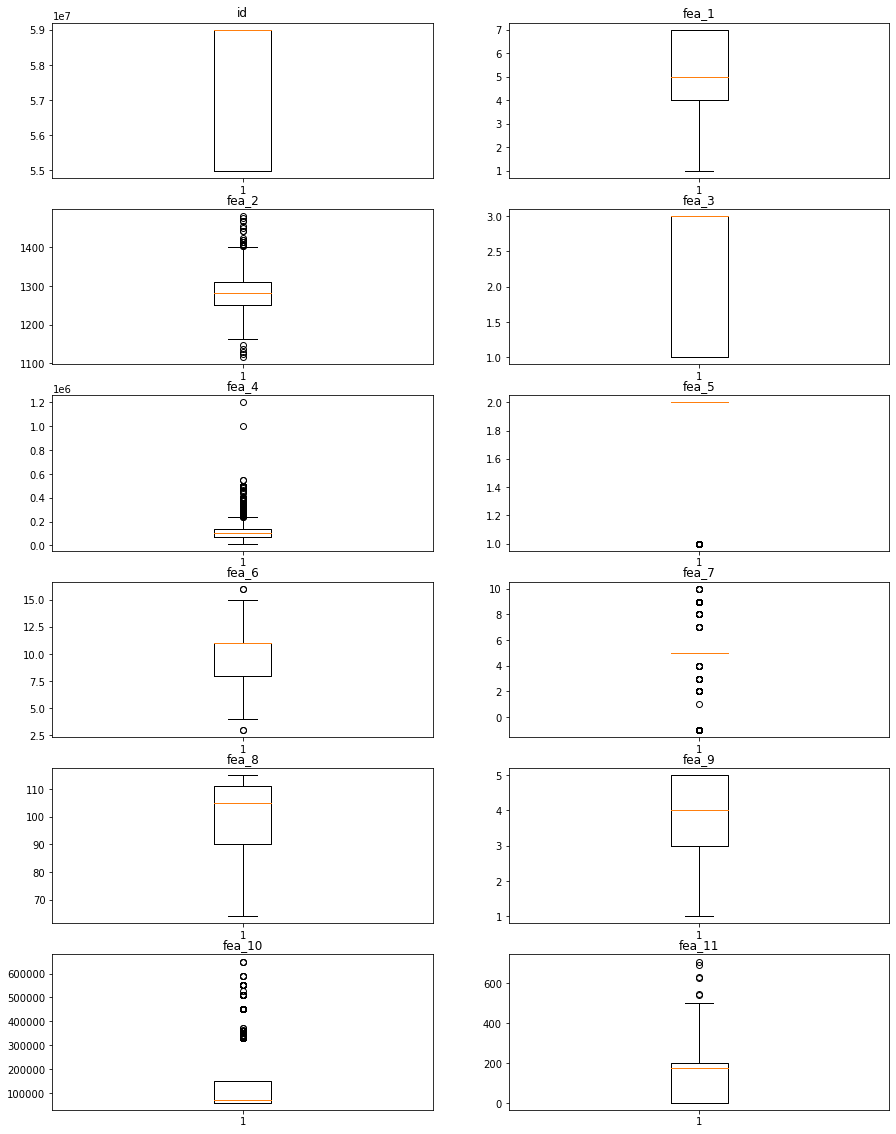

In [12]:
def detect_outliers():   
    plt.figure(figsize = (15,20))
    count = 1
    for col in data.columns[1:]:
        plt.subplot(6,2,count)
        plt.boxplot(data[col])
        plt.title(col)
        count += 1
    plt.show()
detect_outliers()

In [13]:
# removing outliers
def remove_outliers(data_in,col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high= q3 + 1.5 * iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]

In [14]:
for col in data.columns[1:]:
    df= remove_outliers(data,col)

In [15]:
x = data.iloc[:,1:].values
y = data["label"].values

In [16]:
data.shape

(1125, 13)

In [17]:
import seaborn as sns

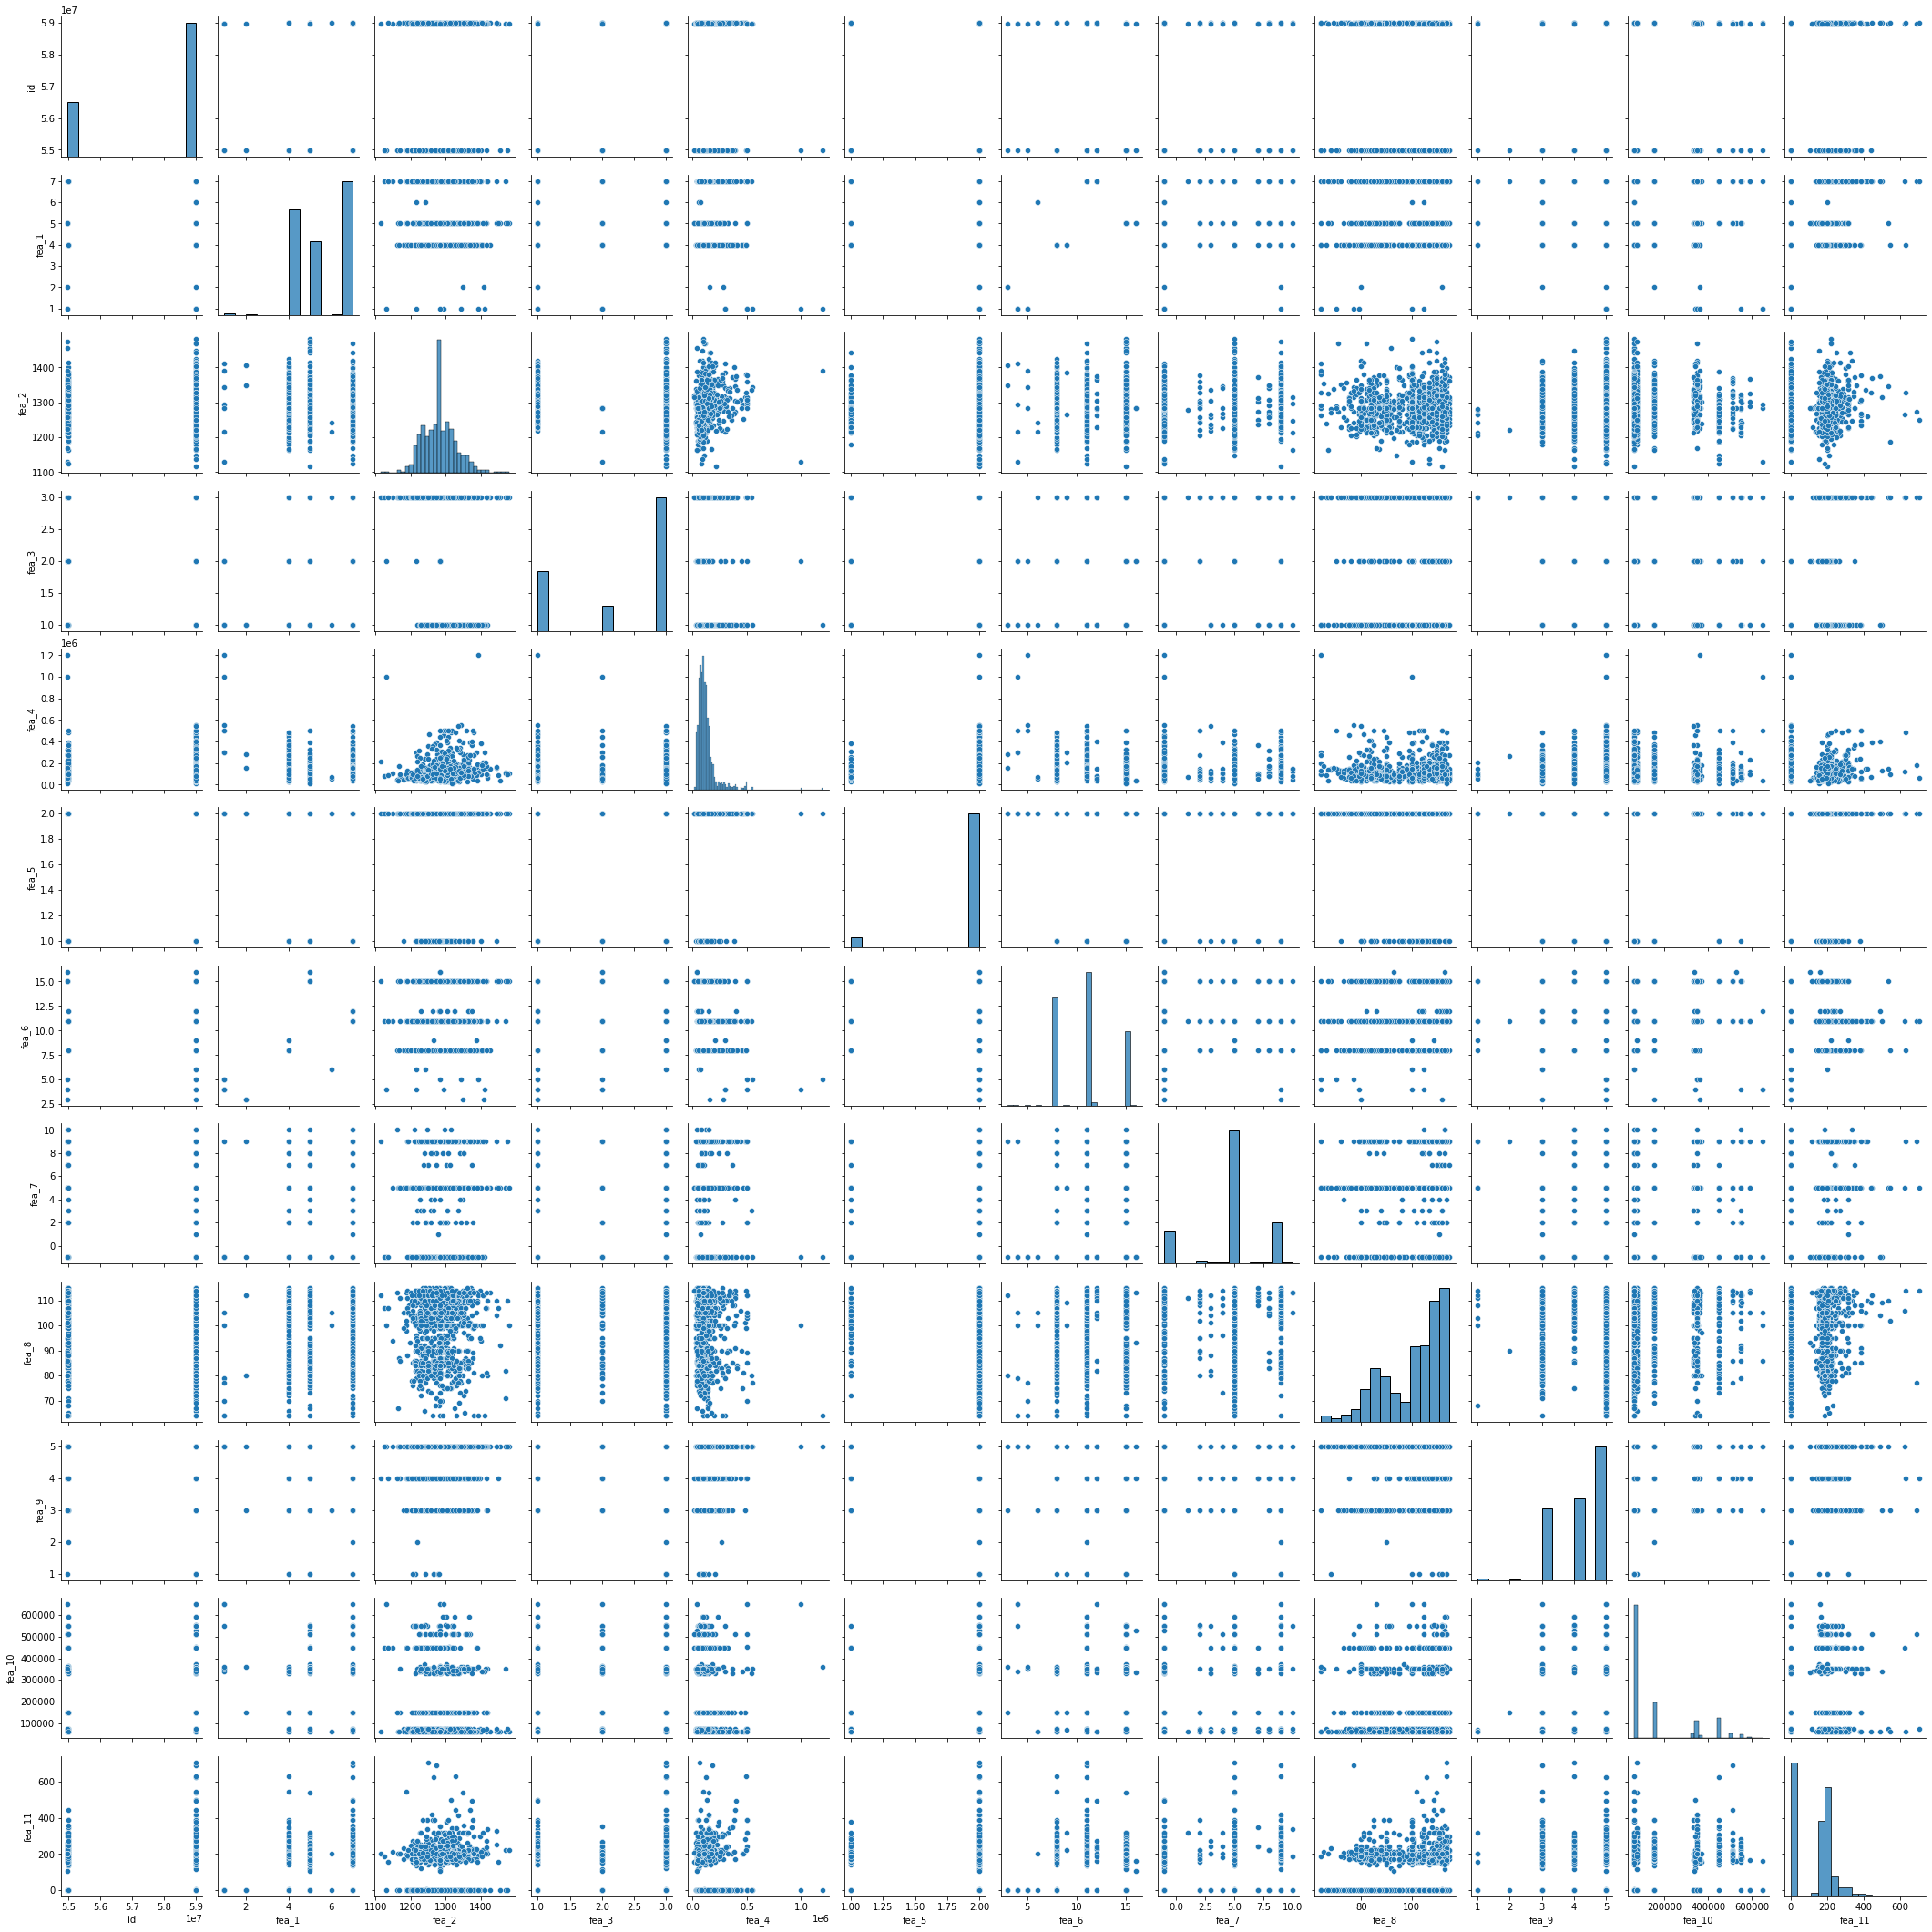

In [18]:
sns.pairplot(data.iloc[:,1:])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [20]:
model = DecisionTreeClassifier(criterion = "gini",max_depth = 3)

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
model.score(x_train,y_train)

0.806861499364676

In [23]:
model.score(x_test,y_test)

0.8047337278106509

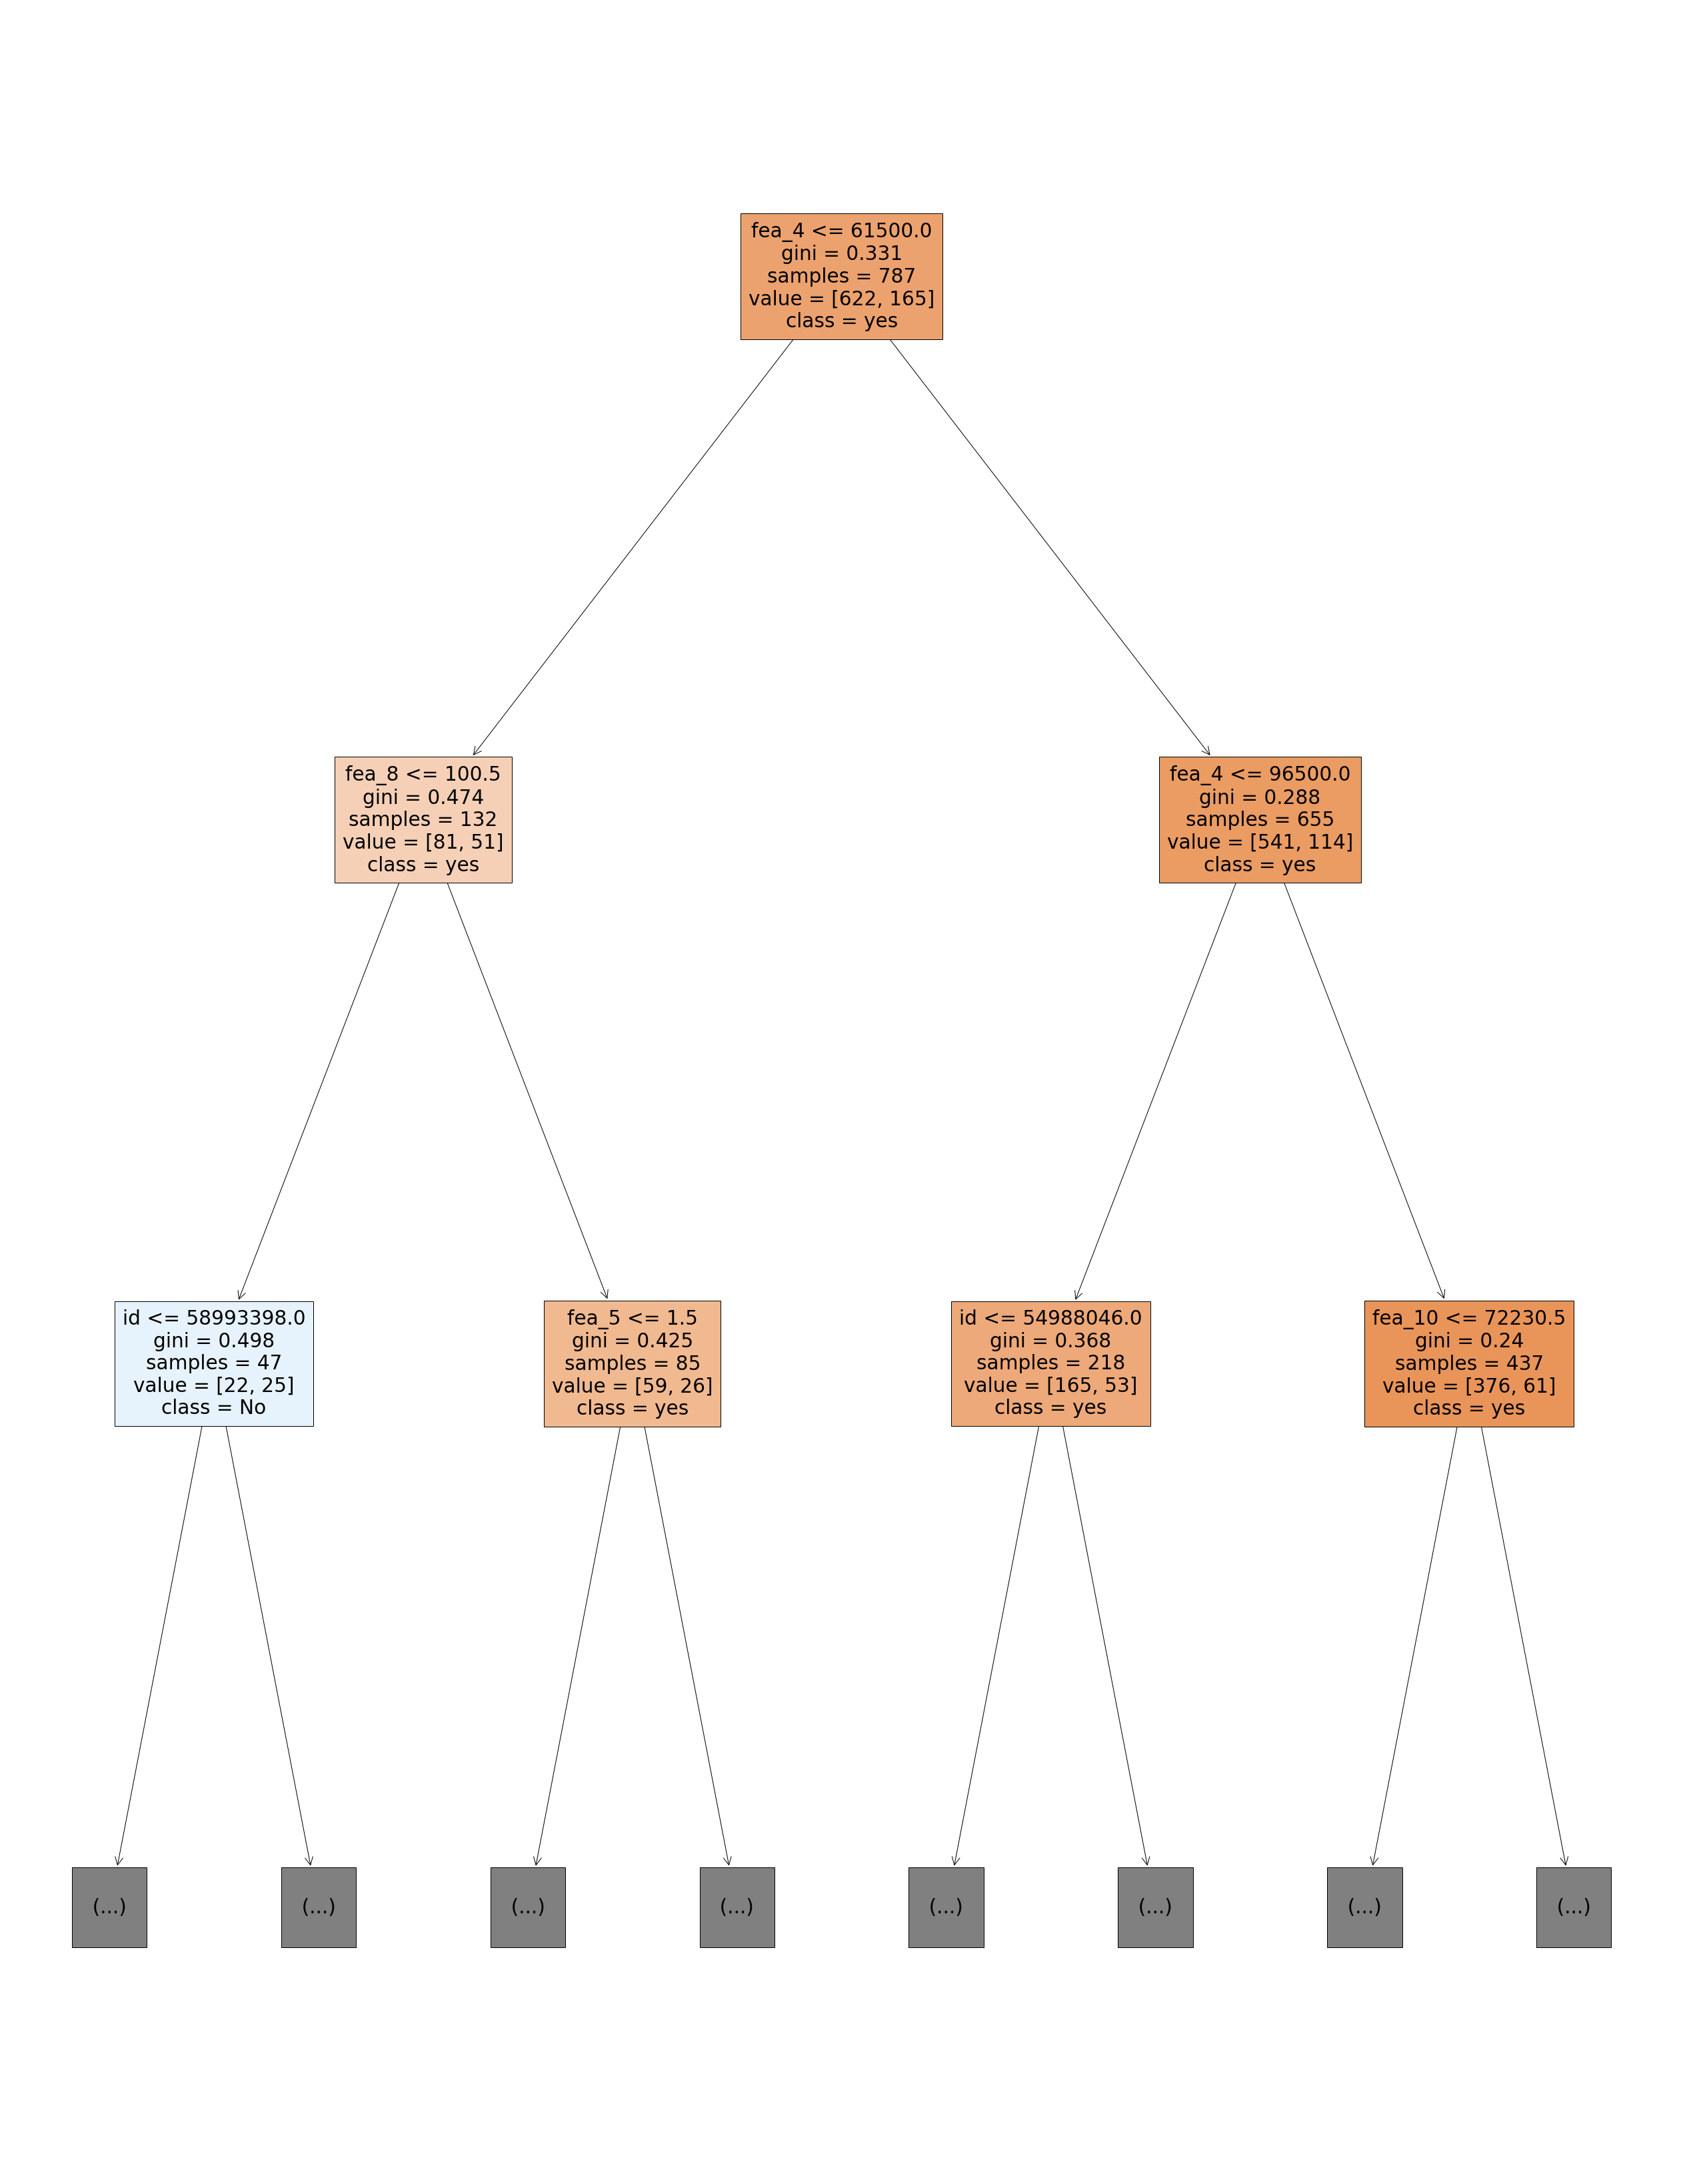

In [24]:
plt.figure(figsize = (45,60))
tree_ = tree.plot_tree(model,max_depth = 2,feature_names = data.columns[1:],class_names =["yes","No"],filled = True)

In [25]:
model2 = DecisionTreeClassifier(criterion = "entropy")

In [26]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

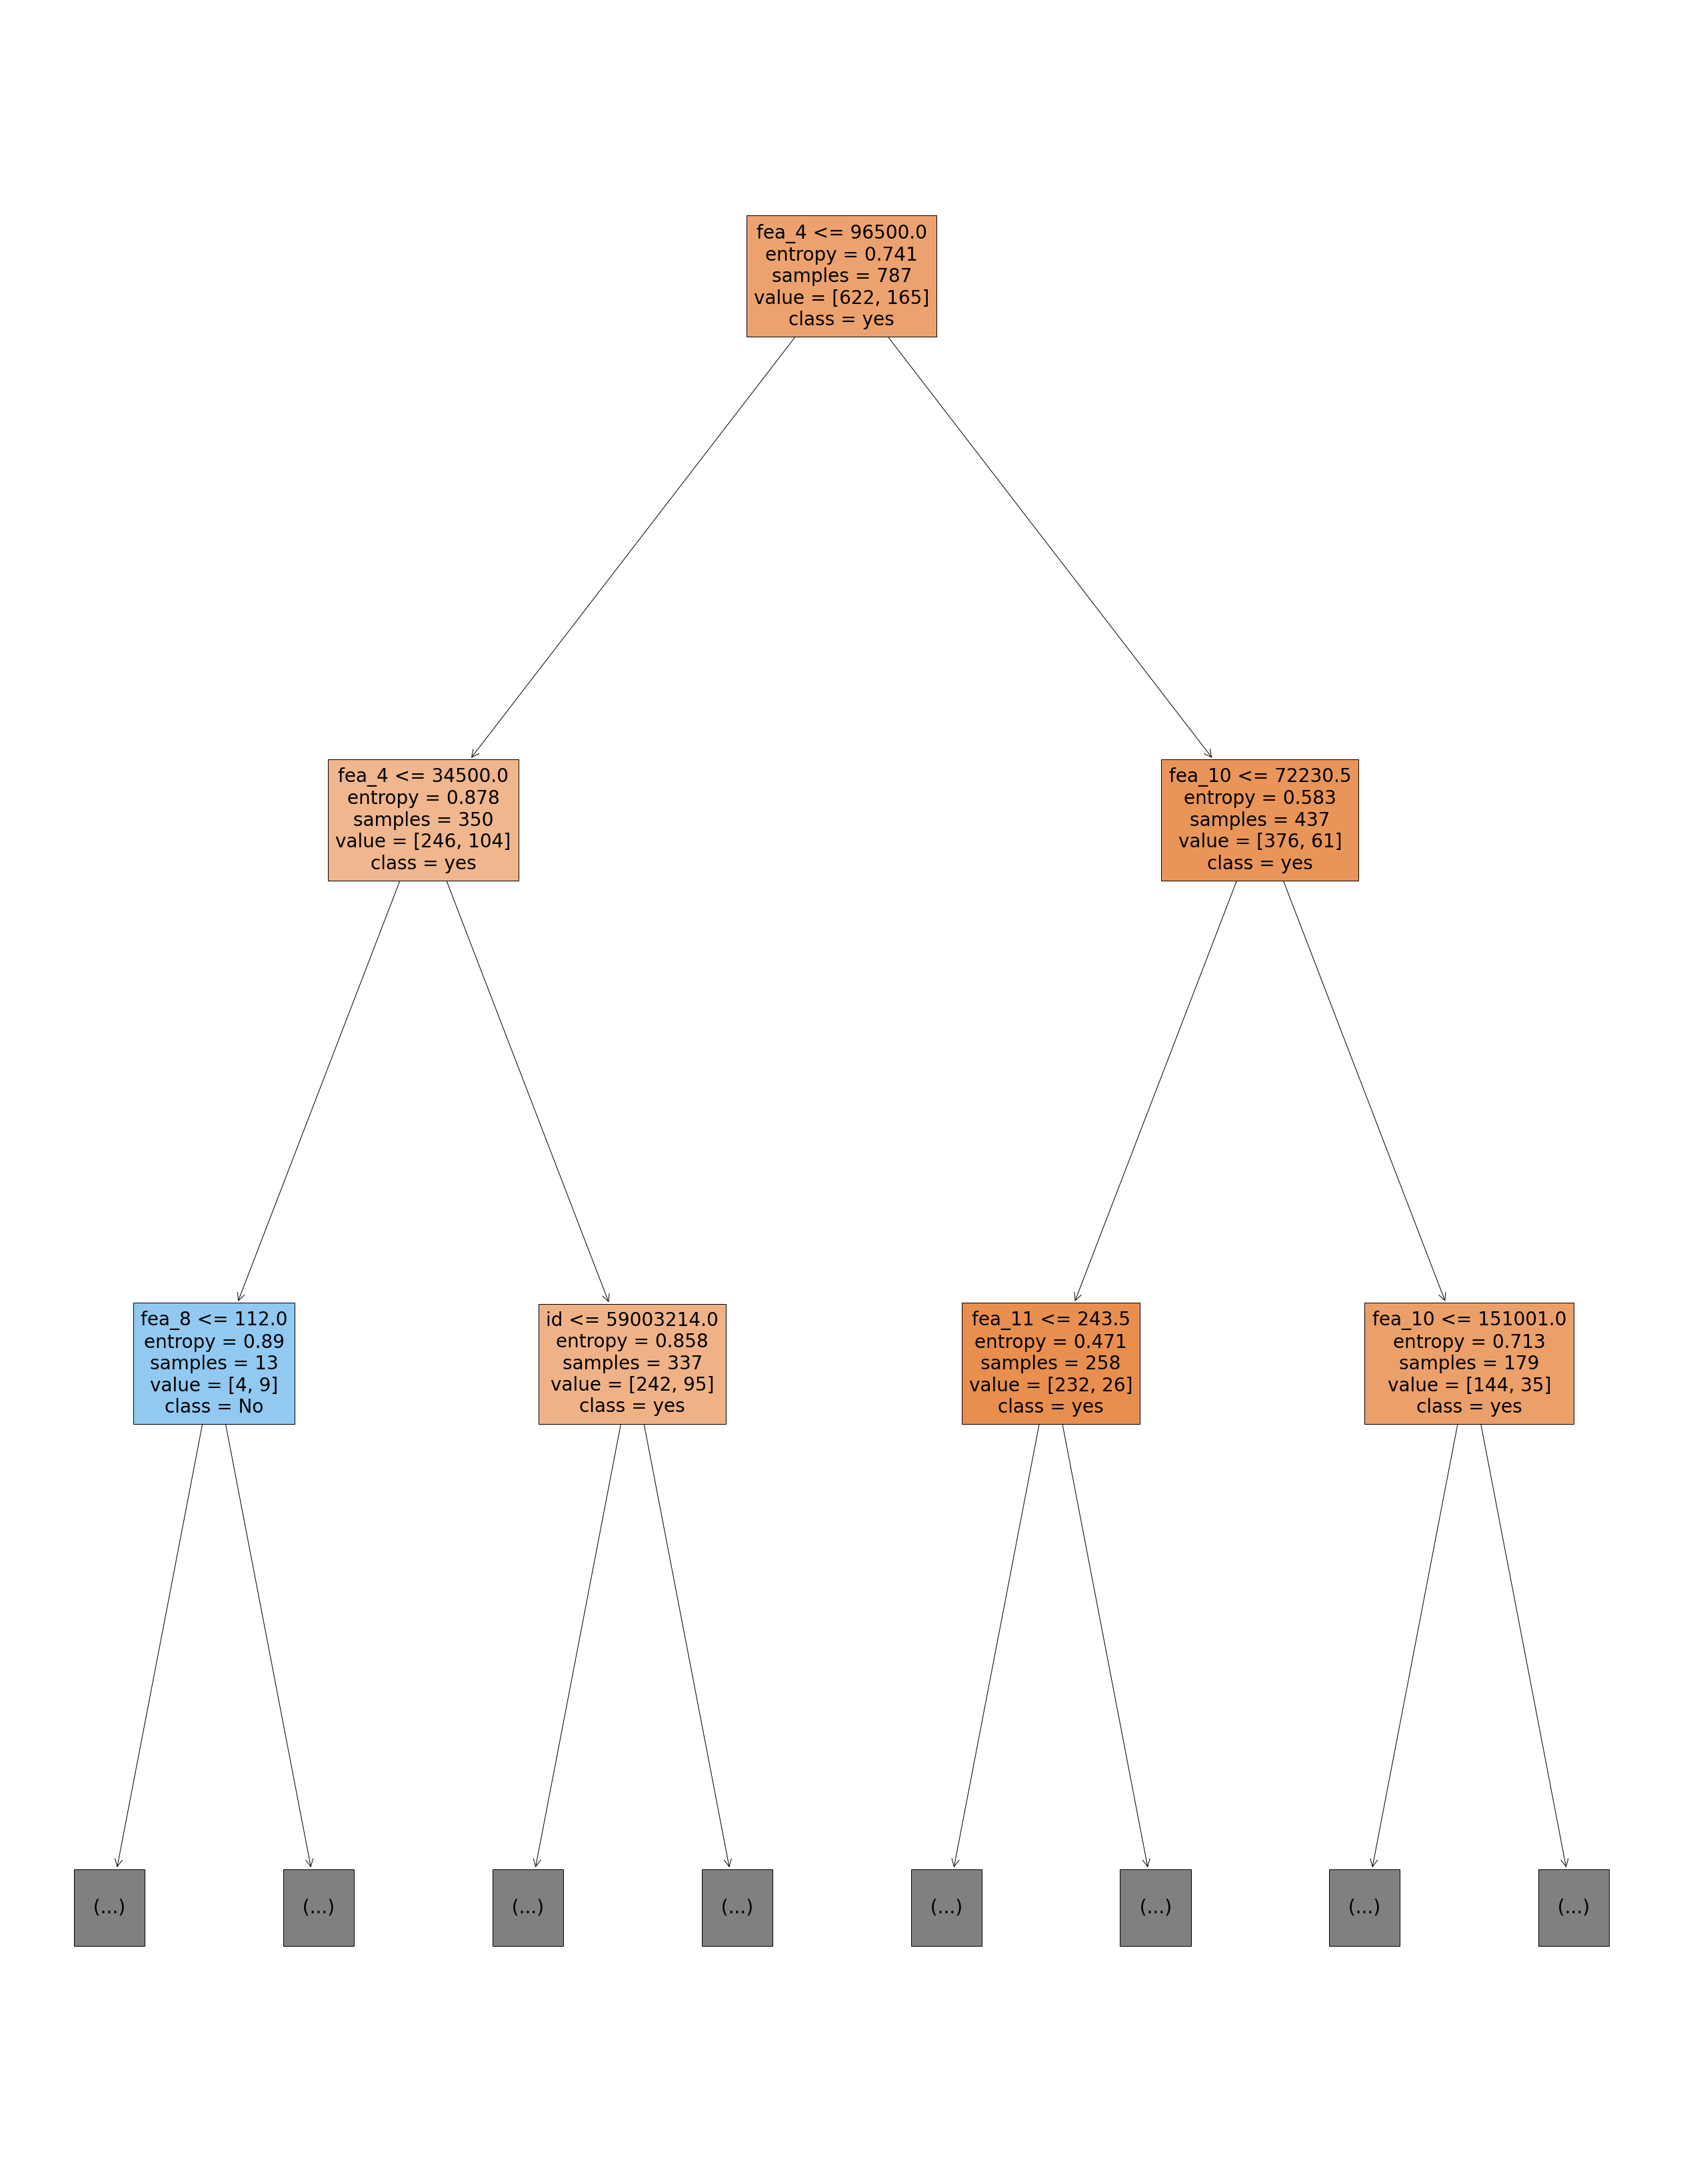

In [27]:
plt.figure(figsize = (45,60))
tree_ = tree.plot_tree(model2,max_depth = 2,feature_names = data.columns[1:],class_names =["yes","No"],filled = True)